                                    """"""""""""""""""""""""""""""""""""""""
                                        Salary Status Classification Model
                                    """"""""""""""""""""""""""""""""""""""""

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data_income = pd.read_csv('income.csv')
data = data_income.copy()

In [5]:
"""
#Exploratory data analysis:
#1. Getting to know the data
#2. Data preprocessing (Missing Values)
#3. Cross tables and data visualization
"""

""" #1. Getting to know the data """

' #1. Getting to know the data '

In [6]:
print(data.info())
#data.isnull()
print('Data columns with null values:\n', data.isnull().sum())
#NO MISSING VARIABLES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None
Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capital

In [7]:
#**** Summary of numerical variables
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [8]:
#**** Summary of categorical variables
summary_cate = data.describe(include = "O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [9]:
#**** Frequency of each categories
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [10]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
#THERE EXIST '?' HOW EXACTLY??

In [12]:
print(np.unique(data["JobType"]))
print(np.unique(data["occupation"]))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [13]:
# ? is shown as ' ?'

In [39]:
#""" READING DATA AGAIN BY REPLACING nan for special characters """

In [3]:
data = pd.read_csv('income.csv', na_values = [" ?"])

In [40]:
#""" #2. Data preprocessing (Missing Values) """

In [17]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [4]:
#1816 - 1809 = 7 values are again missing in occupation. What are they??
missing = data[data.isnull().any(axis = 1)]
#Dropping missing values
data2 = data.dropna(axis = 0)

In [5]:
#Relationship between independent variables
correlation = data2.corr()
correlation 
# NO CORRELATION B/W colomns as values tend towards 0 and not towards 1

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [41]:
#""" #3. Cross tables and data visualization """

In [6]:
#Extracting the column names
data2.columns
#Gender Proportion Table
gender = pd.crosstab(index = data2['gender'],
                  columns = 'count',
                  normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [22]:
#Gender vs Salary Status - Two way column
gender_salstat = pd.crosstab(index = data2['gender'],
                  columns = data2['SalStat'],
                  margins = True,
                  normalize = 'index')
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


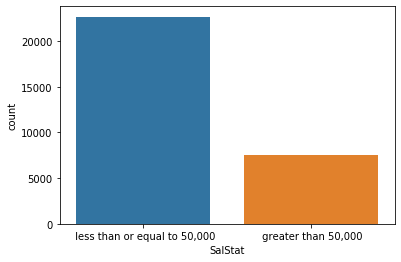

In [23]:
#Frequency Distribution of "Salary Status" using BARPLOT
SalStat = sns.countplot(data2["SalStat"])

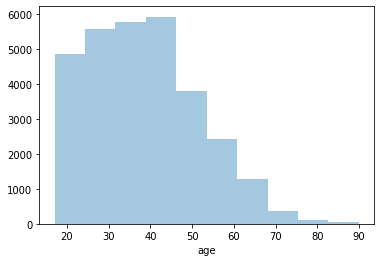

In [24]:
#Histogram of AGE
sns.distplot(data2["age"], bins = 10, kde = False)

SalStat
0    34
1    44
Name: age, dtype: int64

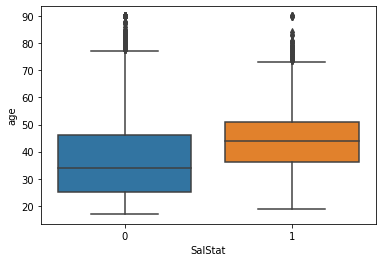

In [95]:
#BOX PLOT for bivariate analysis: Age vs Salary status
sns.boxplot("SalStat", "age", data = data2)
data2.groupby("SalStat")["age"].median()

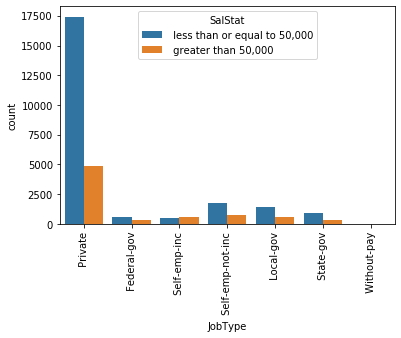

In [26]:
#Job vs Salarystatus
sns.countplot(x = "JobType", data = data2, hue = "SalStat")
plt.xticks(rotation=90)
plt.show()

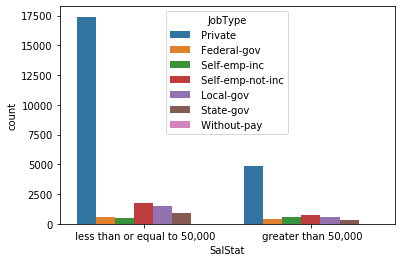

In [27]:
sns.countplot(x = "SalStat", data = data2, hue = "JobType")

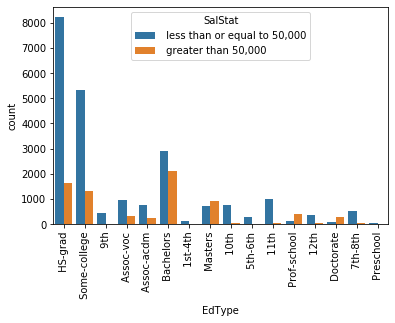

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.071951                       0.928049
 11th                      0.056298                       0.943702
 12th                      0.076923                       0.923077
 1st-4th                   0.039735                       0.960265
 5th-6th                   0.041667                       0.958333
 7th-8th                   0.062837                       0.937163
 9th                       0.054945                       0.945055
 Assoc-acdm                0.253968                       0.746032
 Assoc-voc                 0.263198                       0.736802
 Bachelors                 0.421491                       0.578509
 Doctorate                 0.746667                       0.253333
 HS-grad                   0.164329                       0.835671
 Masters                   0.564229                       0.43

In [28]:
#Education vs Salary status
sns.countplot(x = "EdType", data = data2, hue = "SalStat")
plt.xticks(rotation=90)
plt.show()
Edtype_salstat = pd.crosstab(index = data2['EdType'],
                  columns = data2['SalStat'],
                  margins = True,
                  normalize = 'index')
print(Edtype_salstat)

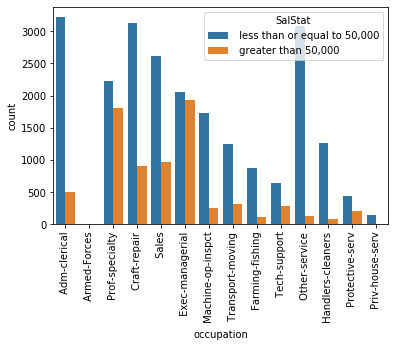

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 Adm-clerical                   0.133835                       0.866165
 Armed-Forces                   0.111111                       0.888889
 Craft-repair                   0.225310                       0.774690
 Exec-managerial                0.485220                       0.514780
 Farming-fishing                0.116279                       0.883721
 Handlers-cleaners              0.061481                       0.938519
 Machine-op-inspct              0.124619                       0.875381
 Other-service                  0.041096                       0.958904
 Priv-house-serv                0.006993                       0.993007
 Prof-specialty                 0.448489                       0.551511
 Protective-serv                0.326087                       0.673913
 Sales                          0.270647                       0

In [29]:
#Occupation vs Salary status
sns.countplot(x = "occupation", data = data2, hue = "SalStat")
plt.xticks(rotation=90)
plt.show()
Occup_salstat = pd.crosstab(index = data2['occupation'],
                  columns = data2['SalStat'],
                  margins = True,
                  normalize = 'index')
print(Occup_salstat)

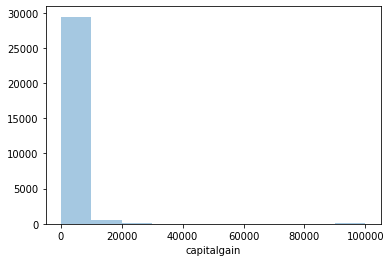

In [30]:
#HISTOGRAM CAPITAL GAIN
sns.distplot(data2["capitalgain"], bins = 10, kde = False)

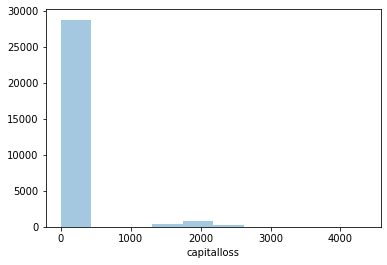

In [31]:
#HISTOGRAM CAPITAL LOSS
sns.distplot(data2["capitalloss"], bins = 10, kde = False)

hoursperweek
1     57.0
2     47.0
3     51.0
4     36.0
5     42.5
6     43.5
7     44.0
8     33.5
9     21.0
10    24.0
11    22.0
12    22.0
13    34.5
14    29.0
15    22.5
16    28.0
17    37.0
18    29.0
19    31.0
20    24.0
21    42.0
22    27.0
23    30.0
24    33.0
25    25.0
26    33.0
27    34.5
28    34.0
29    44.0
30    28.0
31    48.0
32    37.0
33    38.0
34    47.0
35    35.0
36    36.5
37    37.0
38    41.0
39    37.0
40    37.0
41    37.0
42    37.0
43    38.5
44    41.0
45    38.0
46    38.0
47    39.0
48    39.0
49    38.0
50    39.0
51    41.0
52    38.0
53    36.5
54    36.5
55    39.0
56    41.0
57    44.0
58    43.0
59    52.0
60    40.0
61    41.5
62    34.5
63    40.0
64    33.0
65    38.0
66    41.5
67    50.0
68    41.5
70    39.0
72    40.5
73    42.5
74    72.0
75    38.0
76    45.0
77    34.5
78    35.0
80    38.0
81    51.0
82    61.0
84    40.0
85    37.0
86    42.0
87    33.0
88    35.5
89    45.0
90    38.0
91    41.0
92    36.0
94    33.0
95    38

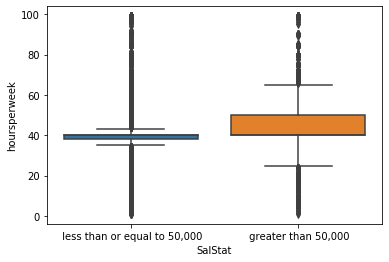

In [32]:
#BOX PLOT for bivariate analysis: Hour per Week vs Salary status
sns.boxplot("SalStat", "hoursperweek", data = data2)
data2.groupby("hoursperweek")["age"].median()

In [42]:
#++++++++++++++++++ LOGISTIC REGRESSION ++++++++++++++++++++++

In [43]:
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})

In [35]:
new_data = pd.get_dummies(data2, drop_first = True)
new_data.head(20)

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,EdType_ 9th,EdType_ Assoc-acdm,EdType_ Assoc-voc,EdType_ Bachelors,EdType_ Doctorate,EdType_ HS-grad,EdType_ Masters,EdType_ Preschool,EdType_ Prof-school,EdType_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,44,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,51,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,20,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,19,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,45,0,0,55,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0

In [36]:
# Storing the column names
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [37]:
# Seperating the input names from data
features = list(set(columns_list) - set(['SalStat']))
print(features)

['nativecountry_ Germany', 'maritalstatus_ Married-civ-spouse', 'occupation_ Farming-fishing', 'maritalstatus_ Married-AF-spouse', 'EdType_ 12th', 'occupation_ Transport-moving', 'EdType_ 1st-4th', 'EdType_ Prof-school', 'occupation_ Protective-serv', 'nativecountry_ China', 'nativecountry_ Yugoslavia', 'nativecountry_ Columbia', 'nativecountry_ Iran', 'EdType_ Masters', 'nativecountry_ Japan', 'occupation_ Other-service', 'occupation_ Exec-managerial', 'nativecountry_ India', 'nativecountry_ Guatemala', 'occupation_ Craft-repair', 'relationship_ Wife', 'nativecountry_ Taiwan', 'nativecountry_ Ireland', 'occupation_ Priv-house-serv', 'JobType_ Self-emp-inc', 'nativecountry_ Greece', 'nativecountry_ Thailand', 'nativecountry_ Scotland', 'maritalstatus_ Never-married', 'gender_ Male', 'maritalstatus_ Widowed', 'race_ Other', 'nativecountry_ Laos', 'EdType_ 7th-8th', 'relationship_ Not-in-family', 'nativecountry_ Honduras', 'occupation_ Machine-op-inspct', 'EdType_ 5th-6th', 'nativecountr

In [38]:
#Storing the output values in y
y = new_data["SalStat"].values
print(y)

[0 0 1 ... 0 0 0]


In [39]:
#Storing the input values in x
x = new_data[features].values
#print(x)

In [44]:
#""" SPLITTING DATA IN TO TRAIN AND TEST """

In [41]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [42]:
#Make an instance of the Model
logistic = LogisticRegression()

In [44]:
#Fitting the values for x and y
logistic.fit(train_x, train_y)
#logistic.coef_
logistic.intercept_

C:\Users\suvar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([-3.0362912])

In [45]:
#Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [46]:
#Confusion Mx: gives the correctness of prediction
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6332  491]
 [ 936 1290]]


In [47]:
#Accuracy of predictions
accuracy_score = accuracy_score(test_y, prediction)
print(100 * accuracy_score)

84.23030169079456


In [48]:
#Misclassified values from prediction
print("Misclassified samples: %d" %(test_y != prediction).sum())

Misclassified samples: 1427


In [45]:
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# LOGISTIC REGESSION - REMOVING INSIGNIFIACANT VARIABLES
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""

In [50]:
#Insignificant Columns removal
cols = ['gender', 'race', 'nativecountry', 'JobType']
new_data2 = data2.drop(cols, axis = 1)

In [46]:
##Reindexing the salary status names to 0,1
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})
#print(data2["SalStat"])

In [47]:
#""" REPEAT THE ABOVE STEPS FROM HERE"""

In [53]:
new_data = pd.get_dummies(new_data2, drop_first = True)

In [54]:
# Storing the column names
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [55]:
# Seperating the input names from data
features = list(set(columns_list) - set(['SalStat']))
print(features)

['maritalstatus_ Married-civ-spouse', 'occupation_ Farming-fishing', 'maritalstatus_ Married-AF-spouse', 'EdType_ 12th', 'EdType_ 1st-4th', 'occupation_ Armed-Forces', 'EdType_ Prof-school', 'occupation_ Transport-moving', 'relationship_ Other-relative', 'occupation_ Protective-serv', 'EdType_ Assoc-acdm', 'occupation_ Prof-specialty', 'capitalgain', 'relationship_ Unmarried', 'EdType_ Masters', 'EdType_ HS-grad', 'occupation_ Exec-managerial', 'occupation_ Other-service', 'EdType_ Assoc-voc', 'occupation_ Craft-repair', 'maritalstatus_ Married-spouse-absent', 'occupation_ Sales', 'relationship_ Wife', 'EdType_ Preschool', 'age', 'occupation_ Priv-house-serv', 'occupation_ Tech-support', 'capitalloss', 'relationship_ Own-child', 'maritalstatus_ Never-married', 'maritalstatus_ Widowed', 'EdType_ 7th-8th', 'relationship_ Not-in-family', 'EdType_ Some-college', 'maritalstatus_ Separated', 'occupation_ Machine-op-inspct', 'EdType_ 5th-6th', 'EdType_ Doctorate', 'EdType_ 9th', 'EdType_ 11th

In [56]:
#Storing the output values in y
y = new_data["SalStat"].values
print(y)

#Storing the input values in x
x = new_data[features].values
print(x)

[0 0 1 ... 0 0 0]
[[ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0 40  0]
 [ 1  0  0 ...  0 40  0]
 ...
 [ 1  0  0 ...  0 40  0]
 [ 1  0  0 ...  0 40  0]
 [ 0  0  0 ...  0 40  1]]


In [58]:
####################################
#SPLITTING DATA IN TO TRAIN AND TEST
####################################
from sklearn.metrics import accuracy_score, confusion_matrix 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 0)

#Make an instance of the Model
logistic = LogisticRegression()

#Fitting the values for x and y
logistic.fit(train_x, train_y)
#logistic.coef_
#logistic.intercept_

#Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

#Accuracy of predictions
accuracy_score = accuracy_score(test_y, prediction)
print(100 * accuracy_score)

C:\Users\suvar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 0 0 0]
83.88772240026522


In [59]:
#Misclassified values from prediction
print("Misclassified samples: %d" %(test_y != prediction).sum())

Misclassified samples: 1458


In [48]:
#""""""""""""""" TILL HERE """""""""""""""""
#""""""""" NO IMPROVEMENT IN ACCURACY """""""""

In [49]:
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#                       KNN
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix 

In [63]:
# Storing the K nearest neighbors classifier
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5)

In [64]:
#Fitting the values foe X and Y
KNN_Classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
#Predicting the test values with model
prediction = KNN_Classifier.predict(test_x)

In [66]:
#Performance Mx check
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6183  640]
 [ 861 1365]]


In [67]:
#accuracy
accuracy_score = accuracy_score(test_y, prediction)
print(100 * accuracy_score)

print("Misclassified samples: %d" %(test_y != prediction).sum())

83.41253177146646
Misclassified samples: 1501


In [68]:
########  STILL MODEL IS WORSE
######## TRY FOR A BETTER MODEL BY TESTING DIFF n_neighbors options

In [70]:
Misclassified_sample = []
#Calculating Error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
    
print(Misclassified_sample)

[1715, 1506, 1562, 1475, 1501, 1435, 1469, 1445, 1459, 1420, 1467, 1453, 1441, 1429, 1453, 1436, 1444, 1422, 1439]


In [50]:
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#                USING n_neighbors = 10
#                and removing insignificant columns
#"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

In [75]:
# Storing the K nearest neighbors classifier
KNN_Classifier = KNeighborsClassifier(n_neighbors = 10)
#Fitting the values foe X and Y
KNN_Classifier.fit(train_x, train_y)
#Predicting the test values with model
prediction = KNN_Classifier.predict(test_x)
#Performance Mx check
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)
#accuracy
accuracy_score = accuracy_score(test_y, prediction)
print(100 * accuracy_score)

print("Misclassified samples: %d" %(test_y != prediction).sum())

[[6406  417]
 [1003 1223]]
84.30765830478506
Misclassified samples: 1420


In [76]:
# VERY LITTLE IMPROVEMENT
# REMOVE INSIGNIFICANT COLUMNS

In [8]:
cols = ['gender', 'race', 'nativecountry', 'JobType']
new_data2 = data2.drop(cols, axis = 1)

In [9]:
#data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000': 0, ' greater than 50,000': 1})
new_data = pd.get_dummies(new_data2, drop_first = True)
columns_list = list(new_data.columns)
features = list(set(columns_list) - set(['SalStat']))
#Storing the output values in y
y = new_data["SalStat"].values
print(y)

#Storing the input values in x
x = new_data[features].values
print(x)

[0 0 1 ... 0 0 0]
[[45  0  0 ...  0  0  0]
 [24  0  0 ...  0  0  1]
 [44  0  1 ...  0  0  0]
 ...
 [23  0  1 ...  0  0  0]
 [42  0  1 ...  0  0  0]
 [29  0  0 ...  0  0  0]]


In [10]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [14]:
# Storing the K nearest neighbors classifier
KNN_Classifier = KNeighborsClassifier(n_neighbors = 10)
#Fitting the values foe X and Y
KNN_Classifier.fit(train_x, train_y)
#Predicting the test values with model
prediction = KNN_Classifier.predict(test_x)
#Performance Mx check
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)
#accuracy
accuracy_score = accuracy_score(test_y, prediction)
print(100 * accuracy_score)

print("Misclassified samples: %d" %(test_y != prediction).sum())

[[6406  417]
 [1003 1223]]
84.30765830478506
Misclassified samples: 1420


In [51]:
# The model is settled at 84% accuracy. By improving the training data more acuracy can be achived.